In [223]:
import numpy as np
import statistics

In [224]:
http_aws_file = open('httpAWS.txt', 'r')
http_times_file = open('httpTimes.txt', 'r')
mqtt_aws_file = open('mqttAWS.txt', 'r')
mqtt_local_file = open('mqttLocal.txt', 'r')

In [225]:
def return_file_content(file):
    latency_values = []
    for latency in file:
        first_index = latency.find('Latency') + 12
        last_index = latency.find(' ms')
        latency_values.append(float(latency[first_index:last_index]))
    file.close()
    return latency_values

In [226]:
http_times_values = return_file_content(http_times_file)
http_aws_values   = return_file_content(http_aws_file)
mqtt_local_values = return_file_content(mqtt_local_file)
mqtt_aws_values   = return_file_content(mqtt_aws_file)

In [227]:
len(http_times_values)

100

In [228]:
len(http_aws_values)

100

In [229]:
len(mqtt_aws_values)

100

In [230]:
len(mqtt_local_values)

100

In [231]:
result_dict = {'http_aws': { 'latency': http_aws_values }, 
    'http_local': {'latency': http_times_values}, 
    'mqtt_aws': {'latency': mqtt_aws_values},
    'mqtt_local': {'latency': mqtt_local_values}}


In [232]:
print(result_dict)

{'http_aws': {'latency': [639.0, 247.0, 477.0, 397.0, 1257.0, 285.0, 537.0, 437.0, 377.0, 277.0, 217.0, 438.0, 357.0, 267.0, 207.0, 417.0, 1257.0, 305.0, 227.0, 447.0, 367.0, 297.0, 217.0, 438.0, 1287.0, 295.0, 217.0, 447.0, 987.0, 296.0, 207.0, 237.0, 357.0, 277.0, 207.0, 448.0, 367.0, 287.0, 207.0, 437.0, 967.0, 286.0, 197.0, 437.0, 1256.0, 305.0, 227.0, 448.0, 387.0, 285.0, 207.0, 1047.0, 305.0, 228.0, 457.0, 377.0, 317.0, 1137.0, 315.0, 258.0, 467.0, 387.0, 297.0, 217.0, 447.0, 378.0, 287.0, 207.0, 437.0, 357.0, 277.0, 218.0, 427.0, 347.0, 267.0, 497.0, 437.0, 348.0, 257.0, 197.0, 407.0, 326.0, 257.0, 1398.0, 2145.0, 305.0, 217.0, 457.0, 367.0, 1218.0, 315.0, 217.0, 1367.0, 315.0, 247.0, 458.0, 407.0, 307.0, 217.0, 467.0]}, 'http_local': {'latency': [407.0, 27.0, 17.0, 27.0, 17.0, 18.0, 27.0, 27.0, 57.0, 17.0, 17.0, 58.0, 1487.0, 15.0, 27.0, 27.0, 17.0, 28.0, 17.0, 27.0, 27.0, 17.0, 17.0, 28.0, 17.0, 47.0, 157.0, 27.0, 27.0, 50.0, 17.0, 17.0, 27.0, 17.0, 17.0, 28.0, 27.0, 17.0, 187

In [233]:
def calculate_stats(arr = []):
    result = {}
    result['mean'] = statistics.fmean(arr)
    result['median'] = statistics.median(arr)
    result['mode'] = statistics.mode(arr)
    result['stdev'] = statistics.stdev(arr)
    result['variance'] = statistics.variance(arr)
    result['cv'] = statistics.stdev(arr) / statistics.fmean(arr)
    result['max'] = max(arr)
    result['min'] = min(arr)
    return result

In [234]:
for key in result_dict:
    result_dict[key]['stats'] = calculate_stats(result_dict[key]['latency'])

In [235]:
result_dict

{'http_aws': {'latency': [639.0,
   247.0,
   477.0,
   397.0,
   1257.0,
   285.0,
   537.0,
   437.0,
   377.0,
   277.0,
   217.0,
   438.0,
   357.0,
   267.0,
   207.0,
   417.0,
   1257.0,
   305.0,
   227.0,
   447.0,
   367.0,
   297.0,
   217.0,
   438.0,
   1287.0,
   295.0,
   217.0,
   447.0,
   987.0,
   296.0,
   207.0,
   237.0,
   357.0,
   277.0,
   207.0,
   448.0,
   367.0,
   287.0,
   207.0,
   437.0,
   967.0,
   286.0,
   197.0,
   437.0,
   1256.0,
   305.0,
   227.0,
   448.0,
   387.0,
   285.0,
   207.0,
   1047.0,
   305.0,
   228.0,
   457.0,
   377.0,
   317.0,
   1137.0,
   315.0,
   258.0,
   467.0,
   387.0,
   297.0,
   217.0,
   447.0,
   378.0,
   287.0,
   207.0,
   437.0,
   357.0,
   277.0,
   218.0,
   427.0,
   347.0,
   267.0,
   497.0,
   437.0,
   348.0,
   257.0,
   197.0,
   407.0,
   326.0,
   257.0,
   1398.0,
   2145.0,
   305.0,
   217.0,
   457.0,
   367.0,
   1218.0,
   315.0,
   217.0,
   1367.0,
   315.0,
   247.0,
   458.0,
   407.

In [236]:
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline

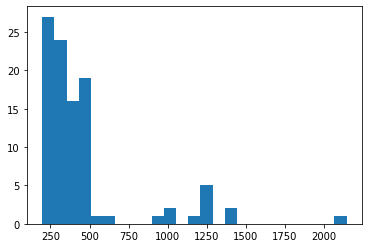

In [237]:
plt.hist(result_dict['http_aws']['latency'], 25)
plt.show()

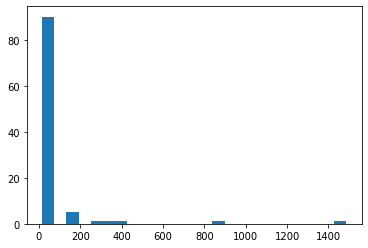

In [238]:
plt.hist(result_dict['http_local']['latency'], 25)
plt.show()

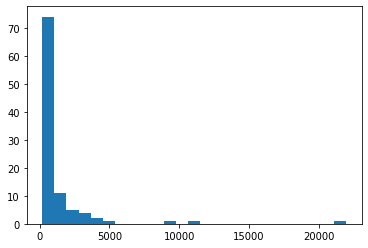

In [239]:
plt.hist(result_dict['mqtt_aws']['latency'], 25)
plt.show()

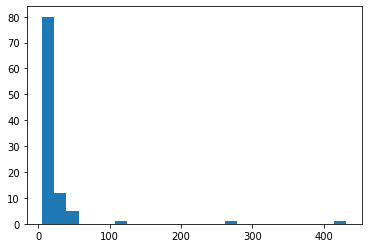

In [240]:
plt.hist(result_dict['mqtt_local']['latency'], 25)
plt.show()